In [1]:
!python --version

Python 3.11.11


Using python 3.11.

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as pp
qml.drawer.use_style('pennylane')


In [3]:
dev1qubit = qml.device('default.qubit', wires = 1, shots = None)

In [4]:
@qml.qnode(dev1qubit)
def RyPiOver2IsHadamard(state):
    r"""Demostration of Rx(pi)Ry(pi/2) = Hadamard: 
    state: 2D vector"""
    qml.AmplitudeEmbedding(features=state,wires=0,normalize=True) #Normalize so that <psi|psi>=1
    # qml.QubitStateVector(state = state, wires = 0)
    # qml.Hadamard(wires = 0)
    qml.RY(np.radians(90), wires=0)
    qml.RX(np.radians(180), wires=0)
    qml.Snapshot()

    return qml.probs(wires=0)

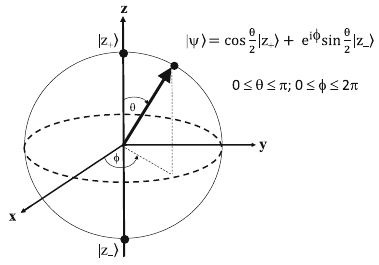

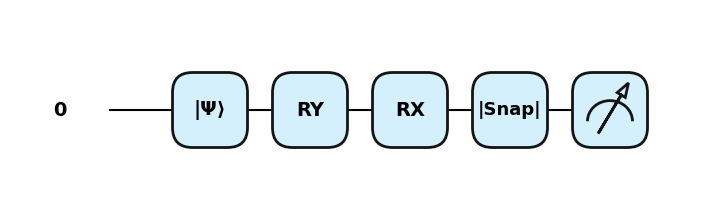

{0: array([-4.32978028e-17-0.70710678j,  4.32978028e-17+0.70710678j]),
 'execution_results': array([0.5, 0.5])}

In [5]:
qubit = [0, 1]
# qubit = [0, 1]
qml.draw_mpl(RyPiOver2IsHadamard)(state = qubit)
pp.show()

qml.snapshots(RyPiOver2IsHadamard)(state = qubit)

# print(qml.draw(RyPiOver2IsHadamard, expansion_strategy="device")(state = qubit))

In [6]:
dev2qubit = qml.device('default.qubit', wires = 2, shots = None)

In [7]:
@qml.qnode(dev2qubit)
def Equally2Superposition(state1, state2):
    """Equally weighted superposition: 
    state1: 2D vector
    state2: 2D vector """
    qml.AmplitudeEmbedding(features=state1,wires=0,normalize=True) #Normalize so that <psi|psi>=1
    # qml.QubitStateVector(state = state1, wires = 0)
    qml.AmplitudeEmbedding(features=state2,wires=1,normalize=True) #Normalize so that <psi|psi>=1
    # qml.QubitStateVector(state = state2, wires = 1)
    
    # qml.Hadamard(wires = 0)
    # qml.Hadamard(wires = 1)
    # qml.RY(np.pi/2, wires=0)
    # qml.RY(np.pi/2, wires=1)n for n in range
    qml.AngleEmbedding(features = [np.radians(90)]*2, wires = [0, 1], rotation = 'Y') # [np.pi/2]*2 = [np.pi/2, np.pi/2]
    qml.AngleEmbedding(features = [np.radians(180)]*2, wires = [0, 1], rotation = 'X') # [np.pi]*2 = [np.pi, np.pi]
    qml.Snapshot('final state')
    


    return qml.probs(wires=[0, 1])

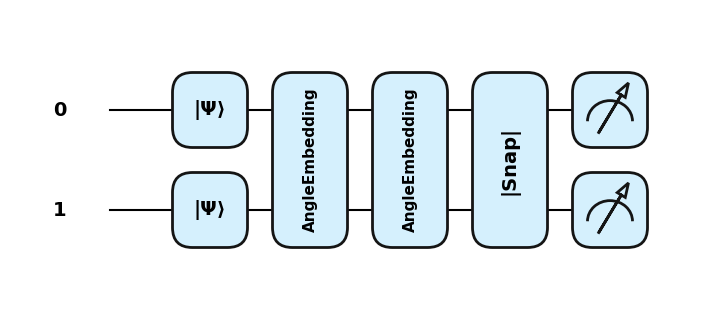

0: ──|Ψ⟩───────RY(1.57)──RX(3.14)──|Snap|─┤ ╭Probs
1: ──RY(3.14)──RY(1.57)──RX(3.14)──|Snap|─┤ ╰Probs


In [8]:
qubit1 = [0, 1]
qubit2 = [0, 1]
qml.draw_mpl(Equally2Superposition)(state1 = qubit1, state2 = qubit2)
pp.show()
print(qml.draw(Equally2Superposition, level="device")(state1 = qubit1, state2 = qubit2))


RY(3.14) = [0, 1]

In [9]:
qubit1 = [0, 1]
qubit2 = [0, 1]
qml.snapshots(Equally2Superposition)(state1 = qubit1, state2 = qubit2)

{'final state': array([-0.5+6.123234e-17j,  0.5-6.123234e-17j,  0.5-6.123234e-17j,
        -0.5+6.123234e-17j]),
 'execution_results': array([0.25, 0.25, 0.25, 0.25])}